In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Demonstration of: 
## 1) a simple Recommendation System using the average_project_value rating of each developer, 
## and
## 2) a content-based Recommender, incorporating both the description and skills of a developer

In [2]:
import pandas as pd
import numpy as np
from numpy import nonzero, count_nonzero

from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from faker import Faker

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv("data/freelancer_ml_clean.csv").drop(["Unnamed: 0"], axis=1)

<IPython.core.display.Javascript object>

In [4]:
df = df.drop_duplicates(subset="name")

<IPython.core.display.Javascript object>

In [5]:
# rename poorly named column to avg_project_value
df = df.rename({"avg_review_clean_project_values": "avg_project_value"}, axis=1)

<IPython.core.display.Javascript object>

# SIMPLE Recommender using avg_project_value to estimate a developer's value

In [6]:
df = df.sort_values(by=["avg_project_value"], ascending=False)

<IPython.core.display.Javascript object>

<AxesSubplot:>

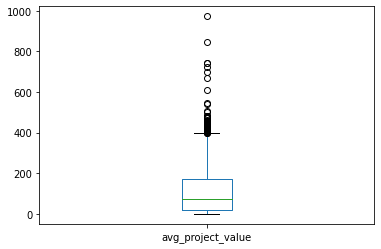

<IPython.core.display.Javascript object>

In [7]:
df["avg_project_value"].plot(kind="box")

# Recommendations based only on avg_project value

In [8]:
# display reccomendations for developers with avg_project_value > 0
df[["name", "avg_project_value"]][df["avg_project_value"] > 0]

,name,avg_project_value
144,Stephen O.,972.850000
88,Michael W.,846.000000
1791,Alejandro,744.200000
104,Martin T.,743.386667
275,Bruno N.,723.000000
...,...,...
905,Arvin M.,0.105000
1073,Ashar M.,0.050000
1148,Harshid V.,0.035000
1045,Tanvi B.,0.020000


<IPython.core.display.Javascript object>

# CONTENT-BASED Recommender using description and skills similarity

### get similarity of descriptions using NLP

In [9]:
# Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words="english")

# Replace NaN with an empty string
df["description"] = df["description"].fillna("")

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df["description"])

# Output the shape of tfidf_matrix
tfidf_matrix.shape

(2145, 13803)

<IPython.core.display.Javascript object>

The tuple's second element indicates the total vocabulary is 13,803.

#### The cosine similarity is independent of magnitude and is relatively easy and fast to calculate, especially when used in conjunction with TF-IDF scores.

In [10]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

<IPython.core.display.Javascript object>

In [11]:
pd.DataFrame(cosine_sim)  # similarity score between each pair of developers

,0,1,2,3,4,5,6,7,8,9,...,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144
0,1.000000,0.026975,0.085236,0.020380,0.000000,0.121721,0.024591,0.086719,0.051753,0.104743,...,0.057624,0.020873,0.007211,0.177102,0.012941,0.034630,0.000000,0.000000,0.007035,0.119717
1,0.026975,1.000000,0.022678,0.048380,0.001292,0.010185,0.089876,0.015813,0.006690,0.050419,...,0.017041,0.032553,0.031946,0.009587,0.025248,0.000000,0.000000,0.000000,0.066849,0.021425
2,0.085236,0.022678,1.000000,0.017430,0.002401,0.034972,0.019155,0.060865,0.003296,0.101315,...,0.035403,0.028367,0.016366,0.063456,0.005331,0.014267,0.000000,0.000000,0.014503,0.126912
3,0.020380,0.048380,0.017430,1.000000,0.044808,0.007017,0.038314,0.004462,0.002633,0.049401,...,0.012652,0.044431,0.019312,0.000000,0.008838,0.000000,0.028801,0.000000,0.013738,0.014462
4,0.000000,0.001292,0.002401,0.044808,1.000000,0.015534,0.001494,0.016747,0.049788,0.005273,...,0.030713,0.005698,0.008803,0.000000,0.045729,0.000000,0.056647,0.000000,0.042637,0.015108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.034630,0.000000,0.014267,0.000000,0.000000,0.014993,0.038580,0.008223,0.000000,0.014708,...,0.000000,0.000000,0.018737,0.027528,0.000000,1.000000,0.000000,0.000000,0.000000,0.038642
2141,0.000000,0.000000,0.000000,0.028801,0.056647,0.005871,0.002611,0.000000,0.025952,0.008534,...,0.010820,0.143849,0.018179,0.000000,0.000000,0.000000,1.000000,0.000000,0.049343,0.026855
2142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009917,0.025319,0.000000,...,0.020210,0.000000,0.026845,0.000000,0.020833,0.000000,0.000000,1.000000,0.022551,0.000000
2143,0.007035,0.066849,0.014503,0.013738,0.042637,0.038881,0.043674,0.016944,0.053867,0.029656,...,0.087702,0.029325,0.125438,0.000000,0.083049,0.000000,0.049343,0.022551,1.000000,0.048973


<IPython.core.display.Javascript object>

### function takes in developer and outputs 10 most similar developers

In [12]:
# Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df["name"]).drop_duplicates()

<IPython.core.display.Javascript object>

## Recommendation function

Get the index of the developer given their name.

Get the list of cosine similarity scores for that particular developer with all developers. Convert it into a list of tuples where the first element is its position, and the second is the similarity score.

Sort the aforementioned list of tuples based on the similarity scores; i.e., the second element.

Get the top 10 elements of this list. Ignore the first element as it refers to self (the developer most similar to a particular developer is the developer itself).

Return the titles corresponding to the indices of the top elements.

In [13]:
def get_contentbased_recs(name, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[name]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    dev_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df["name"].iloc[dev_indices]

<IPython.core.display.Javascript object>

In [14]:
# recommedation (similarity) calculated based only on description
get_contentbased_recs("Guangjie P.")

993            Alejandro U.
1184                Siva S.
11                 Subir B.
953               Silvia L.
1389              Salman S.
182           Juan Fidel A.
1580    Fernando Emanuel G.
1413       Sergio Daniel C.
186        Maria Julieta D.
1734               Scott K.
Name: name, dtype: object

<IPython.core.display.Javascript object>

### Improve on Recommendation performance by incorporating a developer's skills
The quality of the recommender would be increased with the usage of better metadata, i.e. by incorporating skills!

In [15]:
### remove spaces from df column names
df.columns = df.columns.str.replace(" ", "")

<IPython.core.display.Javascript object>

In [16]:
# add trailing space
df.columns = df.columns + " "

<IPython.core.display.Javascript object>

In [17]:
df = df.reset_index(drop=True)

<IPython.core.display.Javascript object>

#### get column names corresponding to nonzero row entry

In [18]:
skills = (
    df.iloc[:, 4:]
    .apply(lambda row: list(row[row > 0].index), axis=1)
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

#### get column values corresponding to nonzero row entry

In [19]:
num_projects = []
for idx, row in df.iloc[:, 4:].iterrows():
    x = row.values
    num_projects.append(list(x[np.nonzero(x)]))

<IPython.core.display.Javascript object>

#### combine column names and values to df

In [20]:
new_df = pd.DataFrame(columns=["skills", "num_projects"])

<IPython.core.display.Javascript object>

In [21]:
new_df["skills"] = skills

<IPython.core.display.Javascript object>

In [22]:
new_df["num_projects"] = num_projects

<IPython.core.display.Javascript object>

#### make nlp soup

In [23]:
soup = []
for idx, row in new_df.iterrows():
    a = row["skills"]
    b = row["num_projects"]
    soup.append(",".join([a[i] * b[i] for i in range(len(a))]).replace(",", ""))

<IPython.core.display.Javascript object>

In [24]:
new_df["nlp"] = soup

<IPython.core.display.Javascript object>

#### get count of words per developer's generated nlp

In [25]:
# Import CountVectorizer and create the count matrix
count = CountVectorizer(stop_words="english")
count_matrix = count.fit_transform(new_df["nlp"])

<IPython.core.display.Javascript object>

In [26]:
count_matrix.shape  # 593 vocabularies

(2145, 593)

<IPython.core.display.Javascript object>

#### measure distance between embeddings

In [27]:
# Compute the Cosine Similarity matrix based on the count_matrix
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

<IPython.core.display.Javascript object>

In [28]:
# Reset index of your main DataFrame and construct reverse mapping as before
indices = pd.Series(df.index, index=df["name "]).drop_duplicates()

<IPython.core.display.Javascript object>

### get content-based recs incoporating descriptions and skills

In [29]:
def get_contentbased_recs(name, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[name]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    dev_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df["name "].iloc[dev_indices]

<IPython.core.display.Javascript object>

In [30]:
# incorporates description and skills to recommend
# developers similar to the specified developer
get_contentbased_recs("Guangjie P.", cosine_sim2)

82                   Dane P.
1442                  Geiler
51      Mohammad Shariful A.
177               Matheus S.
1246               Khizar A.
1074              Vaibhav G.
2108              Ayodeji O.
1395          Abdul Razak Z.
1561               Imtiaz J.
0                 Stephen O.
Name: name , dtype: object

<IPython.core.display.Javascript object>